In [1]:
import pandas as pd

In [2]:
german = pd.read_csv('../datasets/german_transl.csv', index_col = 0)

In [3]:
pt = pd.read_csv('Final300.csv', index_col = 0)

In [4]:
pt

,Ano de Registo,Combustível,Condição,ID,Marca,Origem,Potência,Quilómetros,Segmento,Série,Tipo de Caixa
0,2013,Gasolina,Usados,8073675579,Cadillac,NaN,409,47200,SUV / TT,NaN,Automática
1,2012,Diesel,Usados,8069978966,Porsche,NaN,250,113000,Sedan,NaN,Automática
2,2013,Diesel,Usados,8068316065,Citroën,NaN,115,104000,Citadino,NaN,Manual
3,2018,Diesel,Usados,8074629399,BMW,NaN,190,35000,Sedan,Série 5,Automática
4,2018,Diesel,Usados,8075510964,Mercedes-Benz,Nacional,190,78453,Sedan,Classe E,Automática
...,...,...,...,...,...,...,...,...,...,...,...
15809,2017,Diesel,Usados,8047877369,MINI,Nacional,116,10000,Citadino,NaN,Automática
15810,2015,Gasolina,Usados,8075644442,Yamaha,NaN,200,17900,Supersport,NaN,Unknown
15811,2018,Diesel,Usados,8074969766,BMW,NaN,190,22373,Carrinha,Série 3,Automática
15812,2018,Diesel,Usados,8041049841,BMW,Nacional,190,10000,Sedan,Série 5,Automática


In [5]:
german.groupby(['brand']).agg({'horsepower': 'mean', 'km': 'mean'})

#DataFrame.groupby(self, by=None, axis=0, level=None, as_index: bool = True, sort: bool = True, group_keys: bool = True, squeeze: bool = False, observed: bool = False) 

,horsepower,km
brand,,
alfa_romeo,142.248207,125885.939742
audi,167.005675,125349.427918
bmw,174.861313,130611.090504
chevrolet,142.832309,96931.518876
chrysler,168.044025,133597.484277
citroen,96.860142,116716.731266
dacia,87.570978,84605.678233
daewoo,82.070248,121632.231405
daihatsu,68.444717,116179.361179


In [6]:
dict_transm = {'automatic' : 1, 'manual': 0}

In [64]:
german['transmission'] = german['transmission'].map(dict_transm)

german['transmission'].value_counts()

Series([], Name: transmission, dtype: int64)

In [8]:
german.groupby(['brand','fuel_type'])

In [46]:
gas = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'gas')})
diesel = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'diesel')})
electric = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'electric')})
GPL = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'GPL')})
hybrid = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'hybrid')})
CNG = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'CNG')})

#fuel_type_df = pd.concat([gas, diesel] axis = 0)
fuel_type_df = pd.concat([gas, diesel, electric, GPL, hybrid, CNG], keys=['gas', 'diesel', 'electric', 'GPL', 'hybrid', 'CNG'], axis = 1)

In [47]:
#df.count()

fuel_type_df['year_total'] = fuel_type_df.sum(axis=1)




In [48]:
fuel_type_ratios = fuel_type_df.loc[:,"gas":"CNG"].div(fuel_type_df["year_total"], axis=0)

#fuel_type_df['gas_ratio'] = fuel_type_df['gas'] / fuel_type_df['year_total']

#fuel_type_df

#for c in fuel_type_df:
#3    c = c/fuel_type_df['year_total']

In [49]:
fuel_type_ratios.tail()

,gas,diesel,electric,GPL,hybrid,CNG
,fuel_type,fuel_type,fuel_type,fuel_type,fuel_type,fuel_type
year,,,,,,
2012,0.474545,0.515002,0.001599,0.005042,0.003074,0.000738
2013,0.516459,0.470709,0.000930,0.002604,0.005393,0.003906
2014,0.512589,0.478147,0.001900,0.001663,0.003563,0.002138
2015,0.547929,0.443542,0.001219,0.000812,0.003656,0.002843
2016,0.672185,0.307947,0.009934,0.000000,0.009934,0.000000


In [50]:
fuel_type_ratios.columns = fuel_type_ratios.columns.get_level_values(0)


In [55]:
fuel_type_ratios.index

Int64Index([1923, 1930, 1931, 1932, 1934, 1936, 1937, 1938, 1939, 1941, 1942,
            1943, 1945, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
            1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
            1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
            1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
            1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

In [58]:
import seaborn as sns

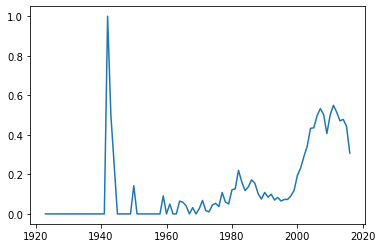

In [62]:
sns.lineplot(data = fuel_type_ratios['diesel'])

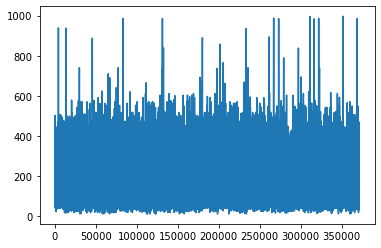

In [63]:
sns.lineplot(data = german['horsepower'])

In [52]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
